# Surface plotter for grid results

Take results file of format (parameters), result and output a figure using the first two parameters.
Easy to change script for multiple plots and different dimensions if needed.


## Script parameters

General parameters

In [1]:
# Results filename
results_name = 'results.txt'
# output to screen (useful if interactive)
iOutputToScreen = True
# output plots to screen (useful if interactive)
plotInteractive = True


Parameters to plot as x and y. Note that in python the first index is 0 NOT 1
The final column in the results.txt file is the comparison metric

In [2]:
# which of the N parameters output to results.txt to plot as x
iPlotAsX = 0
# ... as y
iPlotAsY = 1


### Load packages

In [3]:
if(plotInteractive):
    %matplotlib inline
import numpy as np
from matplotlib  import cm
import matplotlib.pyplot as plt
import matplotlib.mlab as ml

## Read results data

The comparison metric (S) is the final column

In [4]:
lines = [line.rstrip('\n') for line in open(results_name)]
n_rows = len(lines)
n_cols = len(lines[0].strip().split(','))
n_parameters = n_cols - 1
parameters = np.zeros((n_parameters, n_rows))
results = []
results_min = 1.0e10
for i in range(n_rows):
    results.append(float(lines[i].strip().split(',')[n_parameters]))
    if(results[-1]<results_min):
        i_min = i
        results_min = results[-1]
    for j in range(0, n_parameters):
        parameters[j, i] = float(lines[i].strip().split(',')[j])

### Output summary

In [5]:
if(iOutputToScreen):
    print "Found",n_parameters,"input parameters"

Found 2 input parameters


## Select which parameter dimensions to plot

Select x and y from available parameter dimensions for plotting. 

In [6]:
x = parameters[iPlotAsX, ]
y = parameters[iPlotAsY, ]

## Setup plot

Results list creation

In [12]:
z = results

Buffer resolution and plotting parameters

In [14]:
xplotmax = max(x)
yplotmax = max(y)
xplotmin = min(x)
yplotmin = min(y)

bufFactor = 100.
bufX = (xplotmax - xplotmin)/bufFactor
bufY = (yplotmax - yplotmin)/bufFactor


## Plot

To screen if requested, always to file as well.

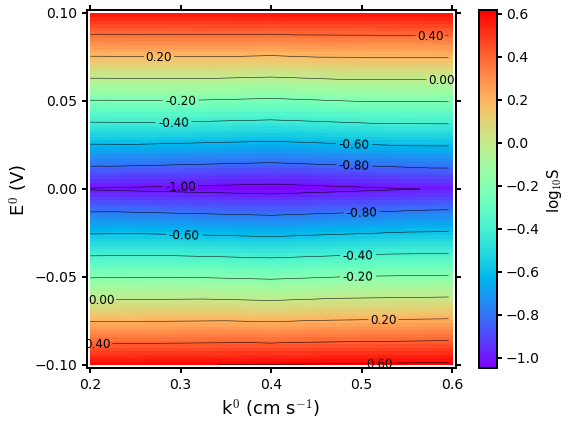

In [16]:
ny, nx = 100, 100
deltax = (xplotmax - xplotmin)/float(nx)
deltay = (yplotmax - yplotmin)/float(ny)
xmin = xplotmin-bufX
xmax = xplotmax+bufX
ymin = yplotmin-bufY
ymax = yplotmax+bufY
xi = np.arange(xmin-bufX, xmax+bufX, deltax)
yi = np.arange(ymin-bufY, ymax+bufY, deltay)
zlog = np.log10(z)
#zi = ml.griddata(x, y, zlog, xi, yi, interp='nn') # 'nn' for incomplete data; 'linear' if complete
zi = ml.griddata(x, y, zlog, xi, yi, interp='linear') # 'nn' for incomplete data; 'linear' if complete

plt.figure(figsize=(8,6),dpi=100)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
CS = plt.contour(xi, yi, zi, 10, linewidths = 0.5, colors = 'k')
# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'
class nf(float):
    def __repr__(self):
        str = '%.2f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.2f' % self.__float__()
        else:
            return '%.2f' % self.__float__()

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r'
else:
    fmt = '%r'
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=12)
#plt.clabel(CS, inline=1, fontsize=10)
plt.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'))
plt.colorbar().set_label(label='log$_{10}$S',size=15)
# if want to add a point - e.g. the best fit point
#plt.scatter(0.0115, 0.217, marker = 'o', c = 'white', s = 100, zorder = 10)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# edit x/y labels here
plt.xlabel("k$^0$ (cm s$^{-1}$)",fontsize=18)
plt.ylabel("E$^0$ (V)",fontsize=18)
plt.tight_layout()
plt.savefig("output.pdf")
if(plotInteractive):
    plt.show()

## Output best fit

Refer back to GenerateScript for the order parameters were setup in the script

In [13]:
if(iOutputToScreen):
    print 'Best fit parameters = ',parameters[:,i_min]
    print 'With value = ',results_min, i_min

Best fit parameters =  [ 0.4  0. ]
With value =  0.0899361898283 4
